In [294]:
import requests
import alpha_vantage
import numpy as np
import pandas as pd
import datetime
import time

API_URL = "https://www.alphavantage.co/query"
apikey = "MUUC77JI6H962K75"

from alpha_vantage.timeseries import TimeSeries
from pprint import pprint


ts = TimeSeries(key=apikey, output_format='pandas')
MINUTE_INT = 60

data, meta_data = ts.get_daily_adjusted(symbol='QQQ', outputsize='full')

times = []
rows = data.shape[0]
for i in range(rows):
    times = np.append(times, pd.Timestamp.now() - pd.Timedelta(days=rows-i))



# pd.DatetimeIndex.strftime(times, date_format="%Y-%m-%d")
df = pd.DataFrame(data=times, columns=['date'])
df['date'] = pd.to_datetime(df['date'], unit='d', infer_datetime_format=True)
times

data

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2000-01-03,192.3800,192.3800,181.500,189.50,84.2312,18172600.0,0.0000,1.0
2000-01-04,184.0000,187.0000,175.900,176.50,78.4528,16893300.0,0.0000,1.0
2000-01-05,175.0000,178.3000,168.500,176.60,78.4973,21248300.0,0.0000,1.0
2000-01-06,173.8000,176.0000,159.500,160.20,71.2076,18567400.0,0.0000,1.0
2000-01-07,165.9000,180.0000,165.000,180.00,80.0085,14069100.0,0.0000,1.0
2000-01-10,182.0000,187.9000,179.900,185.00,82.2310,14837800.0,0.0000,1.0
2000-01-11,183.5000,185.8000,175.300,176.80,78.5862,16273300.0,0.0000,1.0
2000-01-12,178.0000,178.5000,172.000,172.10,76.4971,14525000.0,0.0000,1.0
2000-01-13,177.0000,183.0000,174.200,182.50,81.1198,12582600.0,0.0000,1.0


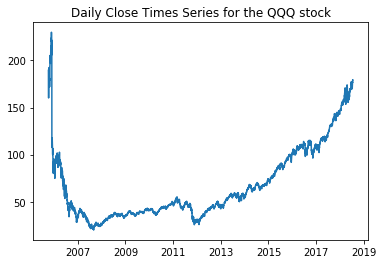

In [295]:
import matplotlib.pyplot as plt

plt.plot(times, data['4. close'])

plt.title('Daily Close Times Series for the QQQ stock')
plt.show()

In [296]:
close = data['4. close'] 

# Percent changes
pct_c = close.pct_change()

pct_c.fillna(0, inplace=True)

pct_c

date
2000-01-03    0.000000
2000-01-04   -0.068602
2000-01-05    0.000567
2000-01-06   -0.092865
2000-01-07    0.123596
2000-01-10    0.027778
2000-01-11   -0.044324
2000-01-12   -0.026584
2000-01-13    0.060430
2000-01-14    0.023562
2000-01-18    0.005353
2000-01-19    0.022364
2000-01-20   -0.009896
2000-01-21    0.012625
2000-01-24   -0.047792
2000-01-25    0.014730
2000-01-26   -0.040323
2000-01-27    0.014566
2000-01-28   -0.050248
2000-01-31    0.043023
2000-02-01    0.026756
2000-02-02    0.008686
2000-02-03    0.038751
2000-02-04    0.006736
2000-02-07    0.013896
2000-02-08    0.042132
2000-02-09   -0.035558
2000-02-10    0.032828
2000-02-11   -0.022983
2000-02-14   -0.001502
                ...   
2018-06-04    0.009031
2018-06-05    0.003098
2018-06-06    0.005834
2018-06-07   -0.008131
2018-06-08    0.000057
2018-06-11    0.002694
2018-06-12    0.005260
2018-06-13   -0.000057
2018-06-14    0.010124
2018-06-15   -0.003491
2018-06-18   -0.002712
2018-06-19   -0.002833
2018-0

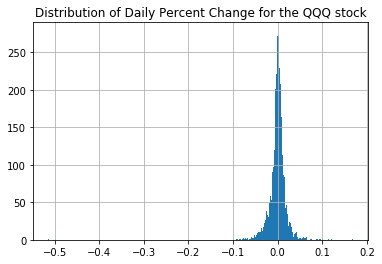

count    4662.000000
mean        0.000187
std         0.019098
min        -0.513989
25%        -0.006584
50%         0.000878
75%         0.007706
max         0.168413
Name: 4. close, dtype: float64


In [217]:
#distribution of daily percent change
pct_c.hist(bins=500)

plt.title('Distribution of Daily Percent Change for the QQQ stock')
plt.show()

print(pct_c.describe())

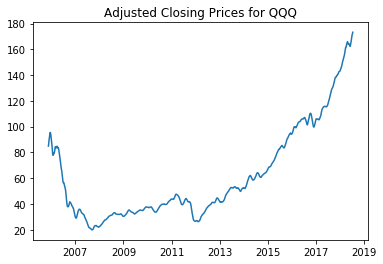

In [226]:
# adjusted closing prices 
adj_close = data['5. adjusted close']

# moving average
moving_avg = adj_close.rolling(window=40).mean()

plt.plot(times, moving_avg)
plt.title("Adjusted Closing Prices for QQQ")
plt.show()

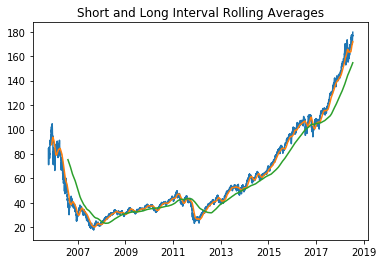

In [240]:
# Short moving window rolling mean
shortWindow = 50
longWindow = 300

data[shortWindow] = adj_close.rolling(window=shortWindow).mean()

data[longWindow] = adj_close.rolling(window=longWindow).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
plt.plot(times, data[['5. adjusted close', shortWindow, longWindow]])

plt.title("Short and Long Interval Rolling Averages")
plt.show()

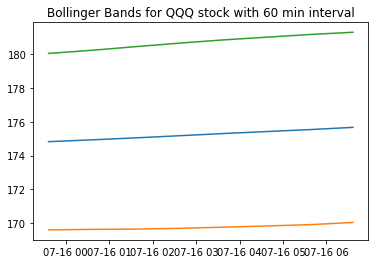

In [249]:
from alpha_vantage.techindicators import TechIndicators

ti = TechIndicators(key='YOUR_API_KEY', output_format='pandas')
data1, meta_data = ti.get_bbands(symbol='QQQ', interval='60min', time_period=60)

times1 = []
rows = data1.shape[0]
for i in range(rows):
    times1 = np.append(times1, (pd.Timestamp.now() - pd.Timedelta(minutes=rows-(60*i))))

plt.plot(times1, data1[["Real Middle Band","Real Lower Band","Real Upper Band"]])
plt.title('Bollinger Bands for QQQ stock with 60 min interval')
plt.show()

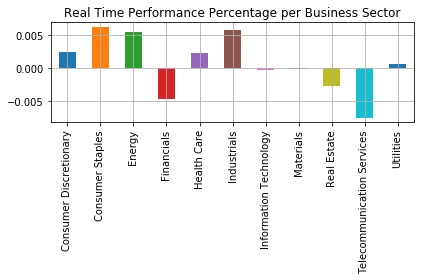

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
Consumer Discretionary,0.0025,0.0025,0.0210,0.0177,0.1063,0.1415,0.2538,0.4553,0.8924,3.2427
Consumer Staples,0.0063,0.0063,0.0095,0.0317,0.0054,-0.0777,-0.0325,0.0730,0.2656,0.9454
Energy,0.0056,0.0056,0.0079,0.0023,0.0804,0.0575,0.1823,0.0480,-0.0668,-0.0700
Financials,-0.0046,-0.0046,0.0114,-0.0318,-0.0327,-0.0351,0.0851,0.3490,0.6316,0.7775
Health Care,0.0023,0.0023,0.0160,0.0291,0.0675,0.0578,0.1006,0.1625,0.7504,1.8102
Industrials,0.0059,0.0059,0.0223,-0.0331,-0.0060,-0.0280,0.0489,0.3276,0.6091,1.0856
Information Technology,-0.0002,-0.0002,0.0232,0.0098,0.0989,0.1532,0.3163,0.8449,1.4887,2.6715
Materials,-0.0001,-0.0001,0.0028,-0.0355,0.0083,-0.0314,0.0642,0.2259,0.4540,0.4847
Real Estate,-0.0027,-0.0027,-0.0084,0.0276,0.0863,-0.0007,0.0371,NaN,NaN,NaN
Telecommunication Services,-0.0075,-0.0075,-0.0158,-0.0123,-0.0120,-0.1031,-0.0046,-0.0224,-0.0678,0.1305


In [252]:
from alpha_vantage.sectorperformance import SectorPerformances

#THIS WOULD HAVE VERY INTERESTING USE CASES WHEN CROSS-REFERENCED WITH A NEWS-SCRAPER API

sp = SectorPerformances(key='YOUR_API_KEY', output_format='pandas')

data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance Percentage per Business Sector')
plt.tight_layout()
plt.grid()
plt.show()
data

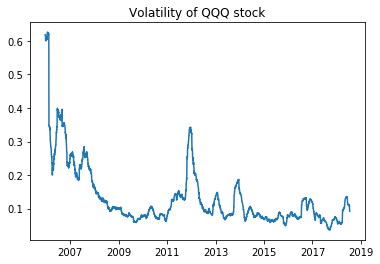

In [255]:
# minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = pct_c.rolling(min_periods).std() * np.sqrt(min_periods) 

plt.plot(times, vol)


plt.title("Volatility of QQQ stock")
plt.show()

In [261]:
# choose short and long windows
short_window = 40
long_window = 100

# create 'signal' column in our dataframe to indicate when to take action (0 = no action, 1 = check to buy or not)
signals = pd.DataFrame(index=data.index)
signals['signal'] = 0.0

# short moving average over the short window
signals['short_rolling'] = data['4. close'].rolling(window=short_window, min_periods=1, center=False).mean()

# long moving average over the long window
signals['long_rolling'] = data['4. close'].rolling(window=long_window, min_periods=1, center=False).mean()

# determine the signal
signals['signal'][short_window:] = np.where(signals['short_rolling'][short_window:] 
                                            > signals['long_rolling'][short_window:], 1.0, 0.0)   

# artificial 'positions' taken based off our buying signals
signals['positions'] = signals['signal'].diff()

signals

,signal,short_rolling,long_rolling,positions
date,,,,
2000-01-03,0.0,189.500000,189.500000,NaN
2000-01-04,0.0,183.000000,183.000000,0.0
2000-01-05,0.0,180.866667,180.866667,0.0
2000-01-06,0.0,175.700000,175.700000,0.0
2000-01-07,0.0,176.560000,176.560000,0.0
2000-01-10,0.0,177.966667,177.966667,0.0
2000-01-11,0.0,177.800000,177.800000,0.0
2000-01-12,0.0,177.087500,177.087500,0.0
2000-01-13,0.0,177.688889,177.688889,0.0


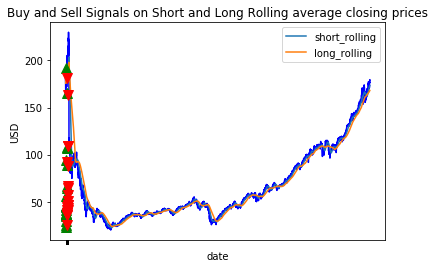

In [297]:
fig = plt.figure()

ax1 = fig.add_subplot(111,  ylabel='USD')

# closing price
data['4. close'].plot(ax=ax1, color='b')

# short and long moving averages
signals[['short_rolling', 'long_rolling']].plot(ax=ax1)

# buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_rolling[signals.positions == 1.0],
         '^', markersize=10, color='g')
         
# sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_rolling[signals.positions == -1.0],
         'v', markersize=10, color='r')

plt.title("Buy and Sell Signals on Short and Long Rolling average closing prices")

#BTW: TRIANGLES ARE NOT SHOWING IN THE RIGHT SPOT, WITH A DIFF SOFTWARE THAT I AM FAMILIAR WITH THIS WOULD 
#NOT BE A PROBLEM, I AM JUST USING THIS ONE FOR CONVENIENCE
plt.show()

In [282]:
# initial holdings
initial_capital= float(100000.0)

# dataframe for our held positions
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# 100 shares
positions['QQQ'] = 100*signals['signal']   
  
# have another dataframe that is the 'portfolio'  
portfolio = positions.multiply(data['5. adjusted close'], axis=0)

# difference in shares owned 
pos_diff = positions.diff()

# adding stats to portfolio
portfolio['holdings'] = (positions.multiply(data['5. adjusted close'], axis=0)).sum(axis=1)

portfolio['U$D'] = initial_capital - (pos_diff.multiply(data['5. adjusted close'], axis=0)).sum(axis=1).cumsum()   

portfolio['total'] = portfolio['U$D'] + portfolio['holdings']

# percent returns from previous row
portfolio['returns'] = portfolio['total'].pct_change()

portfolio

,QQQ,holdings,cash,total,returns
date,,,,,
2000-01-03,0.00,0.00,100000.00,100000.00,NaN
2000-01-04,0.00,0.00,100000.00,100000.00,0.000000
2000-01-05,0.00,0.00,100000.00,100000.00,0.000000
2000-01-06,0.00,0.00,100000.00,100000.00,0.000000
2000-01-07,0.00,0.00,100000.00,100000.00,0.000000
2000-01-10,0.00,0.00,100000.00,100000.00,0.000000
2000-01-11,0.00,0.00,100000.00,100000.00,0.000000
2000-01-12,0.00,0.00,100000.00,100000.00,0.000000
2000-01-13,0.00,0.00,100000.00,100000.00,0.000000


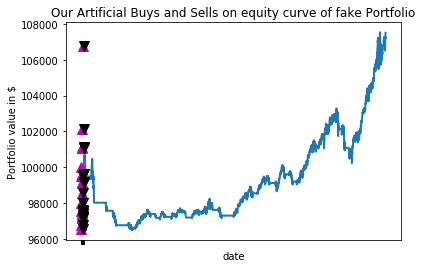

In [298]:

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# value curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# "buy" trades against our value curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# "sell" trades against our value curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

plt.title("Our Artificial Buys and Sells on equity curve of fake Portfolio")

#BTW: TRIANGLES ARE NOT SHOWING IN THE RIGHT SPOT, WITH A DIFF SOFTWARE THAT I AM FAMILIAR WITH THIS WOULD 
#NOT BE A PROBLEM, I AM JUST USING THIS ONE FOR CONVENIENCE
plt.show()

In [283]:

returns = portfolio['returns']

# annual Sharpe ratio (252 avg trading days / year)
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

sharpe_ratio

0.3628765683574929

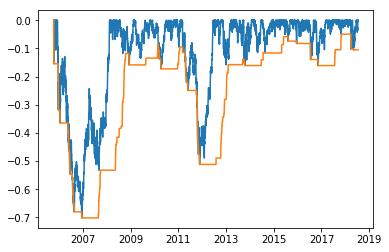

In [287]:
# 252 trading day window
window = 252

drawdown = pd.DataFrame(index=data.index)
# max drawdown in the past window days for each day
rolling_max = data['5. adjusted close'].rolling(window, min_periods=1).max()
drawdown['daily_drawdown'] = data['5. adjusted close']/rolling_max - 1.0

# max (not really max, but largest negative) daily drawdown
drawdown['max_daily_drawdown'] = drawdown['daily_drawdown'].rolling(window, min_periods=1).min()

plt.plot(times,drawdown[['daily_drawdown','max_daily_drawdown']])

plt.show()

In [290]:
numDays = data.shape[0]

# compound annual growth rate
cagr = ((((data['5. adjusted close'][-1]) / data['5. adjusted close'][1])) ** (365.0/numDays)) - 1

cagr

0.06699790794005933

In [291]:
# df.to_json(orient='records', date_format='iso')

# rows = data.shape[0]

# times = []
# for i in range(rows):
#     times = np.append(times, pd.Timestamp.now() - pd.Timedelta(minutes=i*MINUTE_INT))


# df = pd.DataFrame({'date': times, 'price': price})

# price = np.array(data['4. close'])